# Characterization of Humidity Sensors

## The following sensors were used during the experiment:

<table><tr>
<td><img src="images//h1.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>
<td><img src="images//h7.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>    
</tr></table>

###   Impedance-based humidity sensor Hs12SP: This sensor measures relative humidity (RH) and has a high resistance, providing a variable impedance in response to adsorbed water in a thin-film polymer. The chemical functional groups of the polymer decompose in the presence of water, forming ionic groups and increasing the electrical conductivity of the sensor.
<table><tr>
<td><img src="images//h6.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>
<td><img src="images//h8.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>    
</tr></table>

###   Capacitive humidity sensor Hs1101: This sensor consists of a capacitor with a porous polymer between its plates. Water vapor absorbed in the pores causes an increase in the electrical capacitance of the capacitor. A multimeter measures the capacitance using an RLC bridge. The signal source with a known frequency excites the capacitor, which is connected in series with an internal resistor. The alternating current flowing through the capacitor also flows through the resistor, causing a voltage drop across it. Measuring and comparing this voltage with the original signal allows for the calculation of the capacitance.



## Measurements were performed using a multimeter in capacitance measurement mode. The capacitive sensor was placed in each flask with different atmospheres, followed by the impedance sensor, and the readings were recorded. The temperature and atmospheric pressure in the laboratory were measured using a thermohygrometer.

<table><tr>
<td><img src="images//h4.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>
<td><img src="images//h3.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>    
</tr></table>

<table><tr>
<td><img src="images//h2.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>
<td><img src="images//h9.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>    
</tr></table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# utworzenie df z pomiarów spisanych w trakcie ćwiczenia

dict = {'Atmosphere' : ['surrounding','LiCl', 'MgCl', 'Mg(NO)', 'NaCl', 'KCI'],
        
        'RH (theoretical)[%]' : ['-', 11,  36, 55, 75, 85],
        'Capacity Hs1101 [nF]' : [0.17, 0.164, 0.169, 0.172, 0.177, 0.182],
        'Capacity Hs12SP [nF]' : [0.107, 0.007, 0.074, 0.832, 4.63, '-'],
        }
data = pd.DataFrame(dict)

display(data)

,Atmosphere,RH (theoretical)[%],Capacity Hs1101 [nF],Capacity Hs12SP [nF]
0,surrounding,-,0.170,0.107
1,LiCl,11,0.164,0.007
2,MgCl,36,0.169,0.074
3,Mg(NO),55,0.172,0.832
4,NaCl,75,0.177,4.63
5,KCI,85,0.182,-


#### Temperature in the laboratory
T = 22,5℃

#### Relative Humidity (RH) correction of atmospheres for the temperature in the laboratory
<img src="images//h11.jpg" alt="Drawing" style="width: 700px; height: 350px;"/>

In [2]:
data["RH corrected[%]"] = ["-",((11.31+11.30)/2),((33.07+32.78)/2),((54.38+52.89)/2),((75.47+75.29)/2),((85.11+84.34)/2)]

In [3]:
# ustawienie kolumn w poprawny sposób
data = data[['Atmosphere','RH (theoretical)[%]','RH corrected[%]','Capacity Hs1101 [nF]','Capacity Hs12SP [nF]']]

In [4]:
data

,Atmosphere,RH (theoretical)[%],RH corrected[%],Capacity Hs1101 [nF],Capacity Hs12SP [nF]
0,surrounding,-,-,0.170,0.107
1,LiCl,11,11.305,0.164,0.007
2,MgCl,36,32.925,0.169,0.074
3,Mg(NO),55,53.635,0.172,0.832
4,NaCl,75,75.38,0.177,4.63
5,KCI,85,84.725,0.182,-


***
$\mathbf{\text{Calculation of saturated vapor:}}$<br>

***
Arden Buck's equation
$$
  p_n = 0,61121 * exp((18,678-\frac{T}{234,5})(\frac{T}{257,14+T}))
$$ 
$p_n$ – saturated vapor pressure [kPa] <br>
T – temperature [℃] <br>

$$
  p_n = 0,61121 * exp((18,678-\frac{22,5}{234,5})(\frac{22,5}{257,14+22,5})) = 2,72[kPa] = 2720[Pa]
$$ 

***
$\mathbf{\text{Example calculations of partial pressure of water vapor:}}$<br>

***

$$
  p_w = \frac{RH}{100%}*p_n
$$ 
LiCl:
$$
  p_w = \frac{11,305}{100%}*2,72 = 0,307 [kPa]
$$ 

NaCl:
$$
  p_w = \frac{75,38}{100%}*2,72 = 2,05 [kPa]
$$ 

## 1.Determination of surrounding humidity for sensors

### 1.1  Hs1101 Sensor

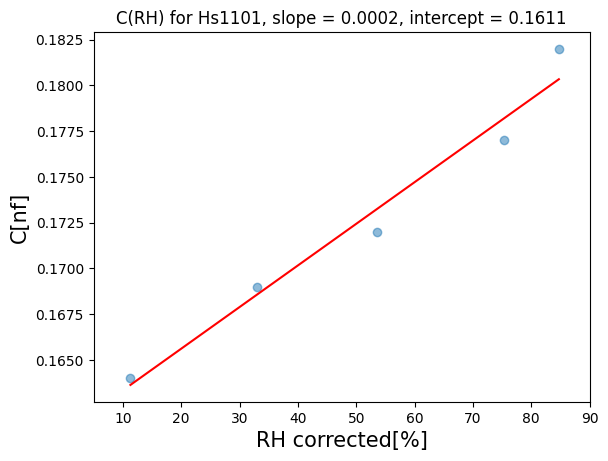

In [7]:
# wykres C(RH) dla czujnika Hs1101 i regresja liniowa pozwalająca obliczyć przypuszczalną wilgotność w pomieszczeniu

x = data.loc[1:5]['RH corrected[%]']
y = data.loc[1:5]['Capacity Hs1101 [nF]']

plt.xlabel('RH corrected[%]', fontsize = 15)
plt.ylabel('C[nf]', fontsize = 15)
plt.xlim(5,90)
plt.scatter(x, y, alpha=0.5)

x1 = np.asarray(data.loc[1:5]['RH corrected[%]'], dtype='float')

y1 = np.asarray(data.loc[1:5]['Capacity Hs1101 [nF]'], dtype='float')

m, b = np.polyfit(x1, y1, 1)

plt.plot(x1, m*x1+b, color='red')

plt.title(f'C(RH) for Hs1101, slope = {round(m, 4)}, intercept = {round(b, 4)}')

plt.show()

***
$\mathbf{\text{Surrounding RH humidity determined for the Hs1101 capacitive sensor:}}$<br>

***
sensor measurement for the surrounding- 0,17[nF]

$$
  y = 0,0002x + 0,1611
$$ 
$$ 
0,17 = 0,0002x + 0,1611
$$ 
$$
x = 44,5{%}
$$

### 1.2 Czujnik Hs12SP

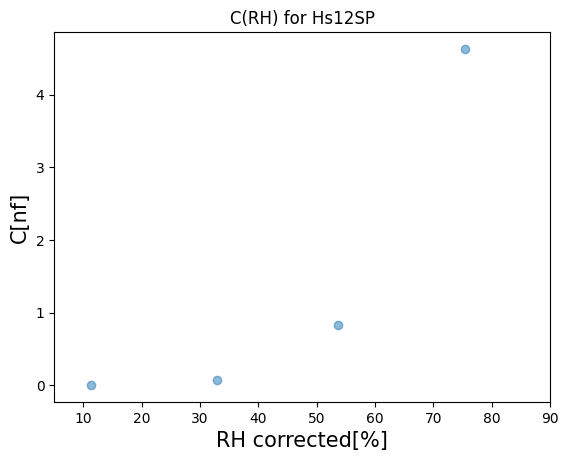

In [9]:
# C(RH) graph for Hs12SP sensor and linear regression to calculate the supposed humidity in the room

x = data.loc[1:4]['RH corrected[%]']
y = data.loc[1:4]['Capacity Hs12SP [nF]']

plt.xlabel('RH corrected[%]', fontsize = 15)
plt.ylabel('C[nf]', fontsize = 15)
plt.xlim(5,90)
plt.scatter(x, y, alpha=0.5)

plt.title(f'C(RH) for Hs12SP')

plt.show()

#### In order to accurately determine the ambient relative humidity, it is necessary to present the data in a log-linear system 

In [12]:
#calculation of the logarithmic value of the Hs12SP capacitance measurement
data['Log(Capacity Hs12SP)'] = np.log10(data.loc[0:4]['Capacity Hs12SP [nF]'].astype('float'))
data

,Atmosphere,RH (theoretical)[%],RH corrected[%],Capacity Hs1101 [nF],Capacity Hs12SP [nF],Log(Capacity Hs12SP)
0,surrounding,-,-,0.170,0.107,-0.970616
1,LiCl,11,11.305,0.164,0.007,-2.154902
2,MgCl,36,32.925,0.169,0.074,-1.130768
3,Mg(NO),55,53.635,0.172,0.832,-0.079877
4,NaCl,75,75.38,0.177,4.63,0.665581
5,KCI,85,84.725,0.182,-,NaN


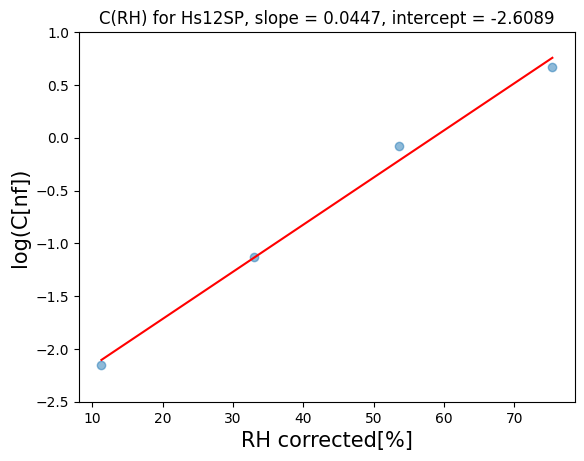

In [13]:
# C(RH) graph for Hs12SP sensor in log-linear system 
#linear regression to calculate the presumed humidity in the room

x = data.loc[1:4]['RH corrected[%]']
y = data.loc[1:4]['Log(Capacity Hs12SP)']

plt.xlabel('RH corrected[%]', fontsize = 15)
plt.ylabel('log(C[nf])', fontsize = 15)#plt.xlim(5,90)
plt.ylim(-2.5,1)
plt.scatter(x, y, alpha=0.5)

x1 = np.asarray(data.loc[1:4]['RH corrected[%]'], dtype='float')

y1 = np.asarray(data.loc[1:4]['Log(Capacity Hs12SP)'], dtype='float')

m, b = np.polyfit(x1, y1, 1)

plt.plot(x1, m*x1+b, color='red')

plt.title(f'C(RH) for Hs12SP, slope = {round(m, 4)}, intercept = {round(b, 4)}')

plt.show()

***
$\mathbf{\text{Surrounding RH humidity determined for the Hs12SP capacitive sensor:}}$<br>

***
sensor measurement for the surrounding- 0,107[nF]

$$
  y = 0,0447x -2,6089
$$ 
$$ 
0,107 = 0,0447x -2,6089
$$ 
$$
x = 60,7{%}
$$

### Determining sensor response and return time
#### Rise time = time to go from 10% to 90% of the 'on' power output values

In [14]:
measurement = pd.read_excel("C:\\Users\\Igor\\Desktop\\wilgo\\Pomiary.xlsx")

In [15]:
measurement.head(10)

,Time,C[F]
0,0.02819,1.712880e-10
1,0.42904,1.711040e-10
2,0.82977,1.707680e-10
3,1.23055,1.711150e-10
4,1.63140,1.715470e-10
5,2.03208,1.715590e-10
6,2.43288,1.714510e-10
7,2.83356,1.710310e-10
8,3.23431,1.710740e-10
9,3.63511,1.711640e-10


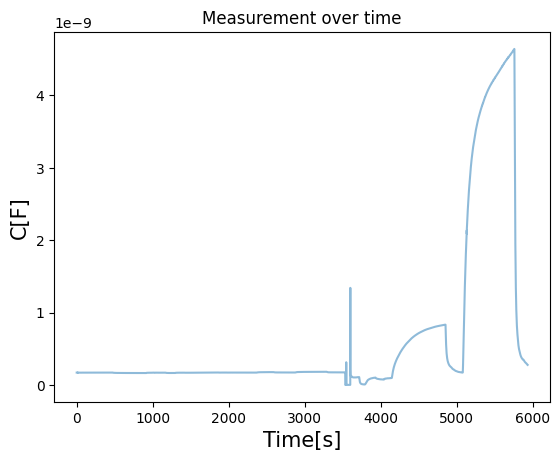

In [16]:

x = measurement['Time']
y = measurement['C[F]']

plt.xlabel('Time[s]', fontsize = 15)
plt.ylabel('C[F]', fontsize = 15)

plt.plot(x, y, alpha=0.5)

plt.title(f'Measurement over time')

plt.show()

Rise time: 3598.46 s


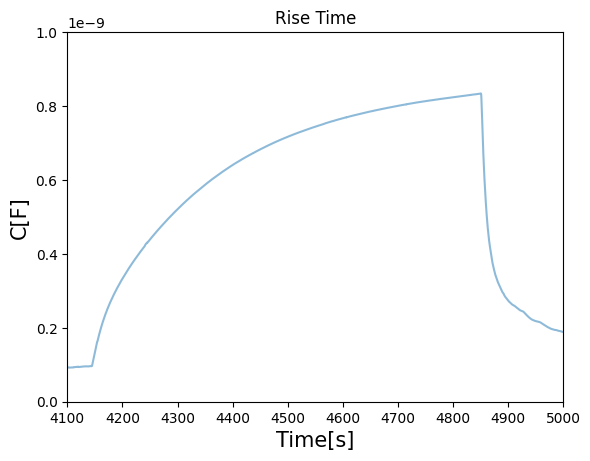

In [17]:
#interesujacy przedział 
x = measurement['Time'] 
y = measurement['C[F]']

plt.xlabel('Time[s]', fontsize = 15)
plt.ylabel('C[F]', fontsize = 15)

plt.xlim(4100,5000)
plt.ylim(0,0.000000001)
plt.plot(x, y, alpha=0.5)

plt.title(f'Rise Time')

# calculate the rise time
threshold_low = 0.1 * max(y)
threshold_high = 0.9 * max(y)
rise_time = 0
for i in range(len(y)):
    if y[i] >= threshold_low and y[i] <= threshold_high:
        rise_time = x[i]
        break
print('Rise time: {:.2f} s'.format(rise_time))

# show the plot

plt.show()

### I used a dedicated tool in OriginPro to calculate the Rise time and Fall time

<img src="images//RiseTime.jpg" alt="Drawing" style="width: 600px; height: 350px;"/>

<img src="images//FallTime.jpg" alt="Drawing" style="width: 600px; height: 350px;"/>

### The calculated ambient RH value for the two sensors differs due to the timing of the measurements - for the capacitive sensor, the measurement was made at the beginning of the class and for the impedance sensor after about an hour, which resulted in an increase in humidity in the room. This was influenced by the number of people in the room, closed windows in the laboratory and the measurements taken. Values in the range of 44.5%-60.7% coincide with the information I checked on typical and recommended indoor humidity values. The response time of the impedance sensor and its return time are very long, due to the sensor's cunstructure. However, the return time is several times shorter, this is due to faster desorption than absorption of water vapor in the sensor. From the measurements and characteristics, it can be seen that the impedance sensor is more sensitive than the capacitive sensor, whose changes between humidities are of the order of a few nF